<a href="https://colab.research.google.com/github/islavathnaveennaik/KNN_Regression/blob/main/KNN__regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performance of K for various types of datasets


In [1]:
!pip install mlxtend==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

In [3]:
data1 = pd.read_csv('ushape.csv')
#data1
data1.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

In [6]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  knn = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k
  knn.fit(x_train, y_train) # train the model
  print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
  # Plotting decision region
  plot_decision_regions(x_train, y_train, clf = knn, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('X') #Names the x-axis
  plt.ylabel('Y') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph

def knn_no_plot(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k
  clf.fit(x, y) # train the model
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  # Plotting decision region
  # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  # # Adding axes annotations
  # plt.xlabel('X') #Names the x-axis
  # plt.ylabel('Y') #Names the y-axis
  # plt.title('Knn with K='+ str(k)) #Names the graph
  # plt.show() #Displays the graph

#Same as aboe, but with logreg
def logistic(data, k = 0):
  x = data[['X','Y']].values
  y = data['class'].astype(int).values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

1
Train Accuracy :  1.0
Val Accuracy :  0.8976190476190476


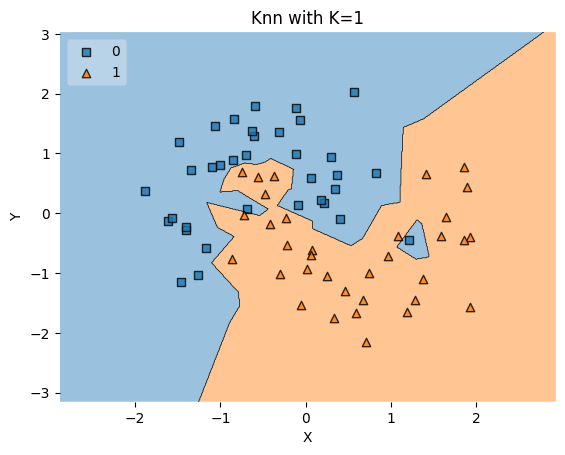

2
Train Accuracy :  0.9855072463768116
Val Accuracy :  0.8809523809523808


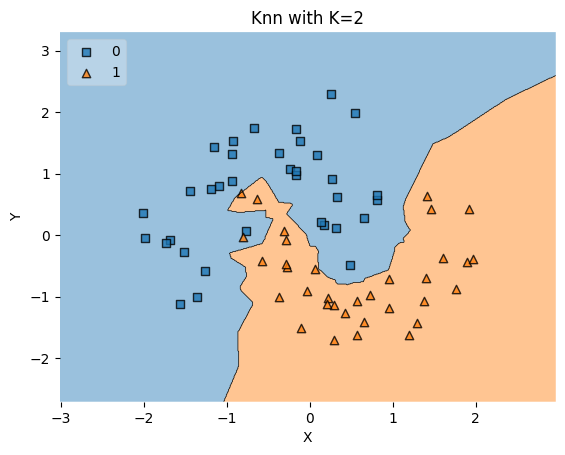

3
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.911904761904762


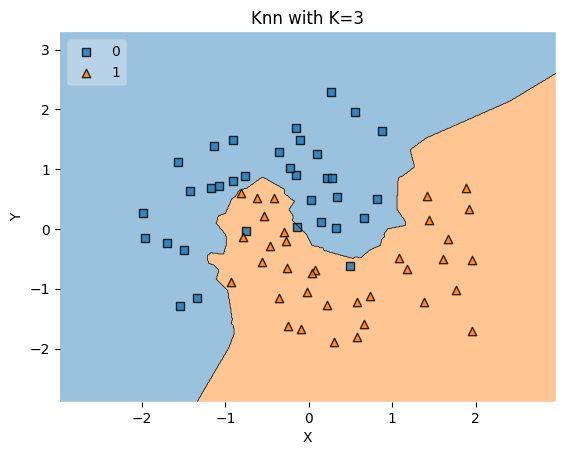

4
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.9547619047619047


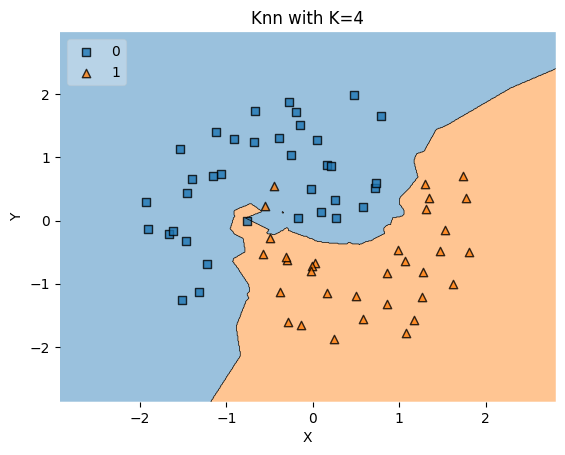

5
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.9285714285714286


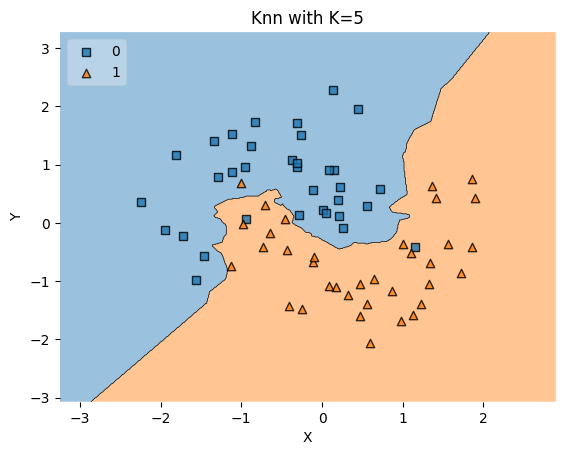

20
Train Accuracy :  0.8260869565217391
Val Accuracy :  0.780952380952381


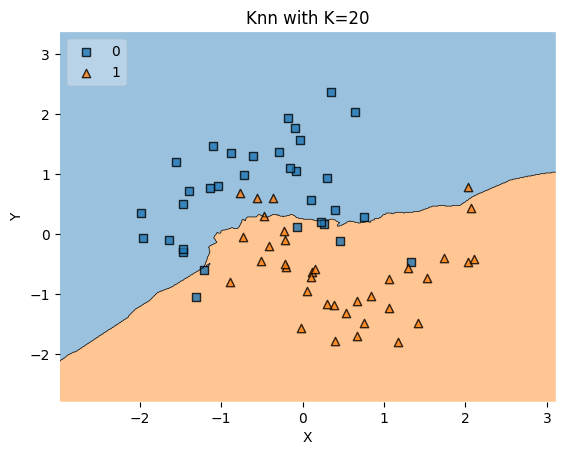

30
Train Accuracy :  0.8115942028985508
Val Accuracy :  0.8142857142857143


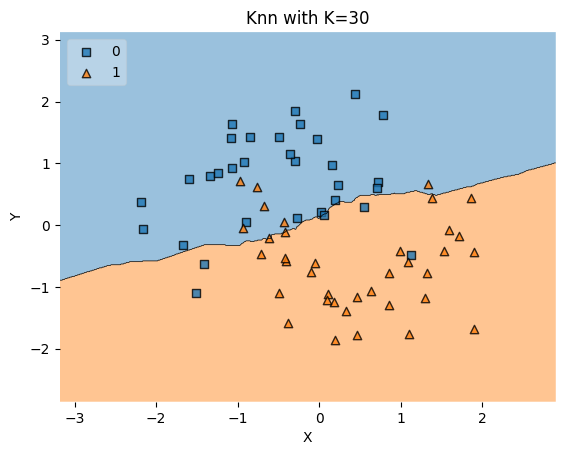

50
Train Accuracy :  0.855072463768116
Val Accuracy :  0.857142857142857


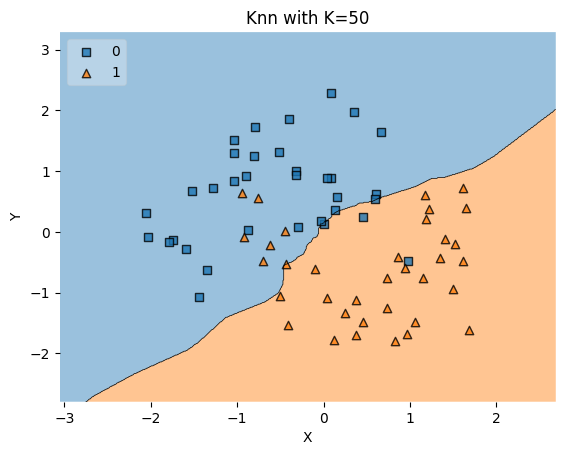

80


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 80, n_samples_fit = 69, n_samples = 69

In [7]:
for i in [1,2,3,4,5,20,30,50,80]:
  print(i)
  knn_comparison(data1,i)

In [8]:
for i in [1,2,3,4,5,20,30,40,80]:
  print(i)
  knn_no_plot(data1,i)

1
K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9400000000000001
2
K :  2  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9394736842105263
3
K :  3  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
4
K :  4  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.9400000000000001
5
K :  5  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
20
K :  20  Train Accuracy :  0.9292929292929293  Val Accuracy :  0.9099999999999999
30
K :  30  Train Accuracy :  0.9191919191919192  Val Accuracy :  0.8589473684210527
40
K :  40  Train Accuracy :  0.8888888888888888  Val Accuracy :  0.8189473684210526
80
K :  80  Train Accuracy :  0.7272727272727273  Val Accuracy :  nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_

#U shaped


In [9]:
data1.columns

Index(['X', 'Y', 'class'], dtype='object')

In [10]:
data1['class']

,class
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
94,1.0
95,1.0
96,1.0
97,0.0


K value  :  1  train score :  1.0  cv score :  0.9571428571428571
K value  :  2  train score :  0.9855072463768116  cv score :  0.9142857142857143
K value  :  3  train score :  0.9855072463768116  cv score :  0.9285714285714286
K value  :  4  train score :  0.9565217391304348  cv score :  0.9261904761904762
K value  :  5  train score :  0.9420289855072463  cv score :  0.9404761904761905
K value  :  6  train score :  0.927536231884058  cv score :  0.9404761904761905
K value  :  7  train score :  0.9565217391304348  cv score :  0.9404761904761905
K value  :  8  train score :  0.9420289855072463  cv score :  0.9404761904761905
K value  :  9  train score :  0.9565217391304348  cv score :  0.9095238095238095
K value  :  10  train score :  0.9565217391304348  cv score :  0.9404761904761905
K value  :  20  train score :  0.855072463768116  cv score :  0.8357142857142857
K value  :  50  train score :  0.8260869565217391  cv score :  0.8119047619047619


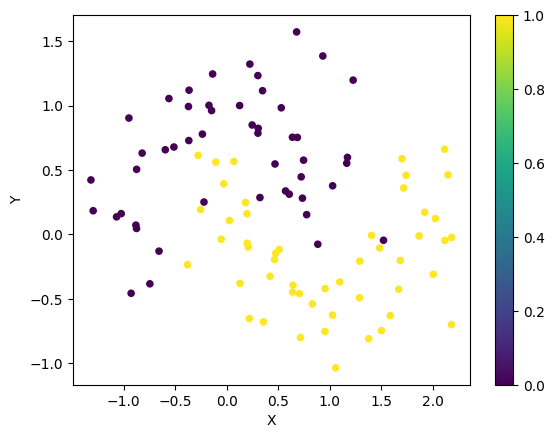

In [11]:
data1.plot(x='X', y='Y', c=data1['class'], kind='scatter', colormap='viridis')
X = data1[['X','Y']].values
y = data1['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


# knn = KNeighborsClassifier(3)
# knn.fit(x_train,y_train)
# #knn.predict(scaler.transform([[0.6,-0.4]]))
# print(knn.predict(scaler.transform([[3,-2]])))
# #knn.score(x_test,y_test)

In [14]:
data1 = pd.read_csv('ushape.csv')
# Rename columns right after reading the CSV file
data1.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

for i in [1,2,3,4,5,20,30,40,80]: #hit n trial
  knn_no_plot(data1,i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9400000000000001
K :  2  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9394736842105263
K :  3  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
K :  4  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.9400000000000001
K :  5  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
K :  20  Train Accuracy :  0.9292929292929293  Val Accuracy :  0.9099999999999999
K :  30  Train Accuracy :  0.9191919191919192  Val Accuracy :  0.8589473684210527
K :  40  Train Accuracy :  0.8888888888888888  Val Accuracy :  0.8189473684210526
K :  80  Train Accuracy :  0.7272727272727273  Val Accuracy :  nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_